# Visualizing Messenger Chat Traffic

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from dateutil.parser import parse as parse_datetime

In [308]:
# define the fonts to use for plots
family = 'Helvetica'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')

# Read source data and load it into lists

In [309]:
# load the csv data file
data = pd.read_csv('../resources/messages.csv')

In [310]:
# convert raw timestamps to pandas Timestamp objects
timestamps = [*map(lambda ts : pd.Timestamp(ts, unit='ms'), data['timestamp'])]
# extract date values
all_dates = [*map(lambda pts : pts.date(), timestamps)]
# extract time values
all_times = [*map(lambda pts : pts.time(), timestamps)]

# Setup series for cumulative traffic plot

In [311]:
# get date-count series
date_counts = pd.Series(all_dates).value_counts().sort_index()
print(f'At least one messgage was sent on {len(date_counts)} dates.')
date_counts[:10]

At least one messgage was sent on 2659 dates.


2011-03-12     60
2011-03-13     24
2011-03-14     17
2011-03-15      6
2011-03-16      1
2011-03-20      3
2011-03-24     10
2011-03-25     27
2011-03-26    223
2011-03-27     12
dtype: int64

In [312]:
# get the whole date range of the analysis
date_range = pd.date_range(start=min(all_dates), end=max(all_dates))
# fill the dates when there was zero chat traffic
date_counts = date_counts.reindex(date_range, fill_value=0)
# set the index to a formatted date representation
date_counts.index = [*map(lambda date : date.strftime("%Y/%m/%d"), date_counts.index)]
print(f'The whole analyzed date range consists of {len(date_counts)} dates.')
date_counts[:10]

The whole analyzed date range consists of 3344 dates.


2011/03/12    60
2011/03/13    24
2011/03/14    17
2011/03/15     6
2011/03/16     1
2011/03/17     0
2011/03/18     0
2011/03/19     0
2011/03/20     3
2011/03/21     0
dtype: int64

# Plot cumulative Messenger traffic

In [313]:
# create a series of labels for the plot: each new year's day
xlabels = pd.Series([date if '01/01' in date else None for date in date_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]

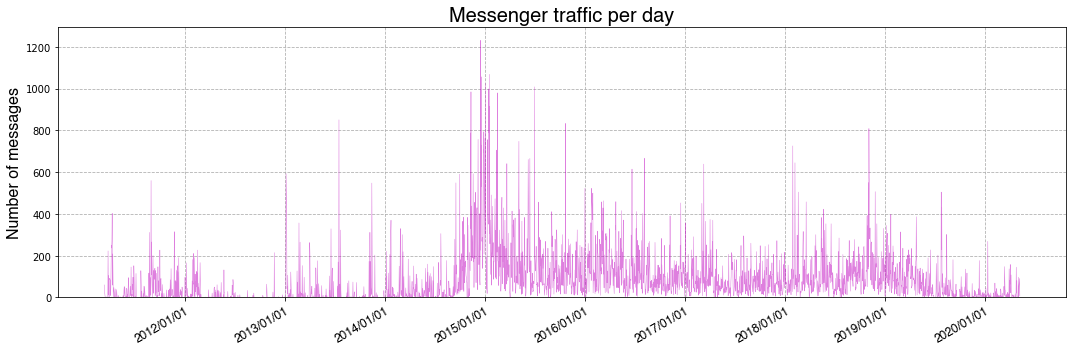

In [314]:
# plot the counts per day
fig = plt.figure(figsize=[15, 5])
ax = date_counts.plot(kind='line', linewidth=0.5, alpha=0.5, color='m')

ax.set_ylim(bottom=0)
ax.grid(True, linestyle='--')
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=30, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.set_ylabel('Number of messages', fontproperties=label_font)
ax.set_title('Messenger traffic per day', fontproperties=title_font)

fig.tight_layout()
fig.savefig('images/messenger-traffic-year.png', dpi=96)
plt.show()

# Setup series for monthly traffic plot

In [315]:
all_months = [*map(lambda date : date.strftime("%Y/%m"), all_dates)]
month_counts = pd.Series(all_months).value_counts().sort_index()
print(f'At least one messgage was sent on {len(month_counts)} months.')
month_counts[:10]

At least one messgage was sent on 111 months.


2011/03     535
2011/04    2203
2011/05     203
2011/06    1097
2011/07     490
2011/08    1521
2011/09    2133
2011/10     686
2011/11    1136
2011/12    1012
dtype: int64

In [316]:
# get the whole date range of the analysis
date_range = pd.date_range(start=min(all_dates), end=max(all_dates), freq='D')
# get the whole month range of the analysis (only looking at uniquw values)
month_range = np.unique(date_range.map(lambda date : date.replace(day=1)))
# fill the months when there was zero chat traffic
month_counts = month_counts.reindex(month_range, fill_value=0)
# set the index to a formatted date representation
month_counts.index = [*map(lambda date : date.strftime("%Y/%m"), month_counts.index)]
print(f'The whole analyzed date range consists of {len(month_counts)} months.')
month_counts[:10]

The whole analyzed date range consists of 111 months.


2011/03     535
2011/04    2203
2011/05     203
2011/06    1097
2011/07     490
2011/08    1521
2011/09    2133
2011/10     686
2011/11    1136
2011/12    1012
dtype: int64

In [317]:
# create a series of labels for the plot: each january
xlabels = pd.Series([month if '/01' in month else None for month in month_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]
xlabels.head()

10    2012/01
22    2013/01
34    2014/01
46    2015/01
58    2016/01
dtype: object

# Plot monthly Messenger traffic

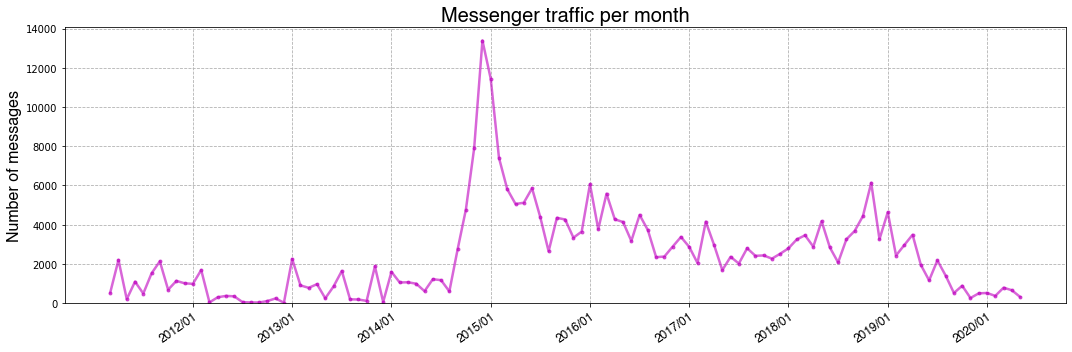

In [318]:
# plot the counts per month
fig = plt.figure(figsize=[15, 5])
ax = month_counts.plot(kind='line', linewidth=2.5, alpha=0.6, color='m', marker='.', markeredgecolor='m')

ax.set_ylim(bottom=0)
ax.grid(True, linestyle='--')
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.set_ylabel('Number of messages', fontproperties=label_font)
ax.set_title('Messenger traffic per month', fontproperties=title_font)

fig.tight_layout()
fig.savefig('images/messenger-traffic-month.png', dpi=96)
plt.show()

# Plot weekly Messenger traffic

In [319]:
# get the count per day of the week
day_counts = pd.DataFrame()
day_counts['count'] = date_counts
day_counts['day_of_week'] = date_counts.index.map(lambda x: parse_datetime(x).weekday())
mean_day_counts = day_counts.groupby('day_of_week')['count'].mean()
xlabels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

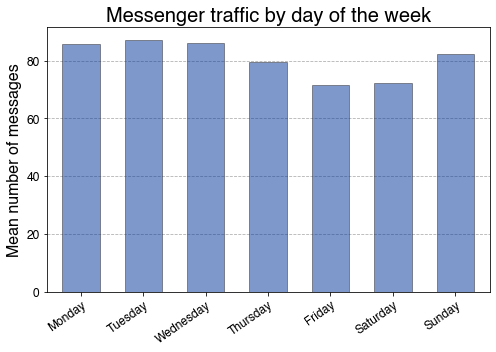

In [320]:
fig = plt.figure(figsize=[7, 5])
ax = mean_day_counts.plot(kind='bar', width=0.6, alpha=0.5, color='#003399', edgecolor='#333333', zorder=2)

ax.yaxis.grid(True, linestyle='--')
ax.set_xticklabels(xlabels, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Messenger traffic by day of the week', fontproperties=title_font)
ax.set_xlabel('')
ax.set_ylabel('Mean number of messages', fontproperties=label_font)

fig.tight_layout()
fig.savefig('images/messenger-traffic-week.png', dpi=96)
plt.show()

# Plot hourly Messenger traffic

In [321]:
# get the count per hour of the day
times = pd.Series(all_times).map(lambda time: '{:02}:00'.format(time.hour))
time_counts = times.value_counts().sort_index()
time_counts.head()

00:00     726
01:00     312
02:00     193
03:00     181
04:00    1157
dtype: int64

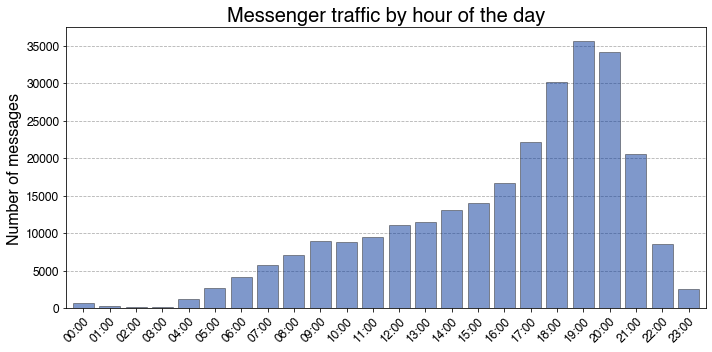

In [322]:
fig = plt.figure(figsize=[10, 5])
ax = time_counts.plot(kind='bar', width=0.8, alpha=0.5, color='#003399', edgecolor='#333333', zorder=2)

ax.yaxis.grid(True, linestyle='--')
ax.set_xticklabels(time_counts.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Messenger traffic by hour of the day', fontproperties=title_font)
ax.set_ylabel('Number of messages', fontproperties=label_font)

fig.tight_layout()
fig.savefig('images/messenger-traffic-hour.png', dpi=96)
plt.show()

# Plot hourly Messenger traffic

In [323]:
# get the count per minute of the day, as hh:mm
minutes = pd.Series(all_times).map(lambda x: '{:02}:{:02}'.format(x.hour, x.minute))
minute_counts = minutes.value_counts().sort_index()
minute_counts.head()

00:00    44
00:01    34
00:02    24
00:03    26
00:04    30
dtype: int64

In [324]:
# not every minute necessarily has a message, so fill in missing times with zeros
time_range = pd.date_range(start='0:00', end='23:59', freq='1min')
index = time_range.map(lambda x: '{:02}:{:02}'.format(x.hour, x.minute))
minute_counts = minute_counts.reindex(index, fill_value=0)
minute_counts.head()

00:00    44
00:01    34
00:02    24
00:03    26
00:04    30
dtype: int64

In [325]:
# create a series of labels for the plot: each new hour
xlabels = pd.Series([label if ':00' in label else None for label in minute_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]

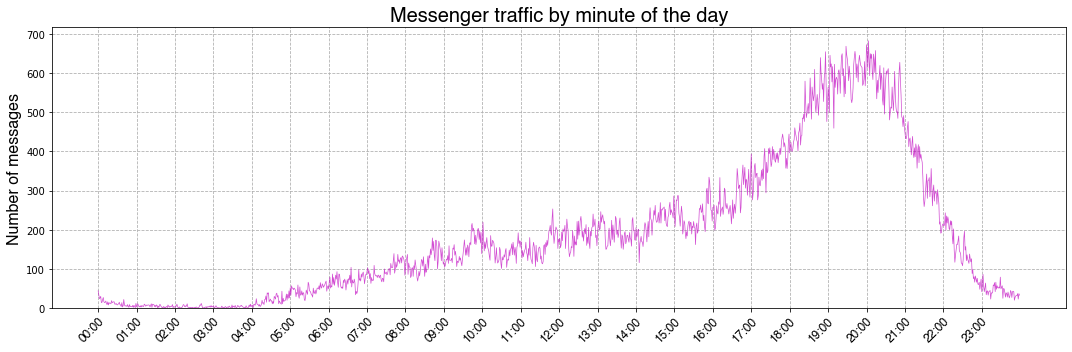

In [326]:
# plot the counts per minute
fig = plt.figure(figsize=[15, 5])
ax = minute_counts.plot(kind='line', linewidth=0.7, alpha=0.7, color='m')

ax.set_ylim(bottom=0)
ax.grid(True, linestyle='--')
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.set_ylabel('Number of messages', fontproperties=label_font)
ax.set_title('Messenger traffic by minute of the day', fontproperties=title_font)

fig.tight_layout()
fig.savefig('images/messenger-traffic-minute.png', dpi=96)
plt.show()